<a href="https://colab.research.google.com/github/junxnone/examples/blob/master/keras/image-segmentation-keras/train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive


In [5]:
%cp 'My Drive'/dataset1.zip /content/
%cd /content/
!unzip -q dataset1.zip

/content


In [8]:
!pip -q install git+https://github.com/divamgupta/image-segmentation-keras.git

In [9]:
from keras_segmentation.models.unet import vgg_unet
model = vgg_unet(n_classes=51, input_height=416, input_width=608)
model.train(
    train_images =  "dataset1/images_prepped_train/",
    train_annotations = "dataset1/annotations_prepped_train/",
    checkpoints_path = "/tmp/vgg_unet_1" , epochs=5
)


Using TensorFlow backend.






58892288/58889256 [==============================] - 6s 0us/step













  4%|▍         | 16/367 [00:00<00:02, 157.83it/s]

Verifying training dataset


100%|██████████| 367/367 [00:02<00:00, 181.65it/s]


Dataset verified! 
Starting Epoch  0
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/1
512/512 [==============================] - 150s 294ms/step - loss: 1.1557 - acc: 0.6749
saved  /tmp/vgg_unet_1.model.0
Finished Epoch 0
Starting Epoch  1
Epoch 1/1
512/512 [==============================] - 141s 275ms/step - loss: 0.7353 - acc: 0.7680
saved  /tmp/vgg_unet_1.model.1
Finished Epoch 1
Starting Epoch  2
Epoch 1/1
512/512 [==============================] - 141s 274ms/step - loss: 0.5505 - acc: 0.8288
saved  /tmp/vgg_unet_1.model.2
Finished Epoch 2
Starting Epoch  3
Epoch 1/1
512/512 [==============================] - 140s 274ms/step - loss: 0.4567 - acc: 0.8577
saved  /tmp/vgg_unet_1.model.3
Finished Epoch 3
Starting Epoch  4
Epoch 1/1
512/512 [==============================] - 140s 274ms/step - loss: 0.3823 - acc: 0.8802
saved  /tmp/vgg_unet_1.model.4
Finished Epoch 4


In [10]:
print(model.evaluate_segmentation(inp_images_dir="dataset1/images_prepped_test/", annotations_dir="dataset1/annotations_prepped_test/"))

101it [00:19,  5.65it/s]

{'frequency_weighted_IU': 0.7769698334135919, 'mean_IU': 0.10512125770225857, 'class_wise_IU': array([0.93786018, 0.82674587, 0.0275274 , 0.91572453, 0.67448042,
       0.81758475, 0.11454551, 0.11807502, 0.46180374, 0.2319463 ,
       0.05209797, 0.18279245, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        ])}


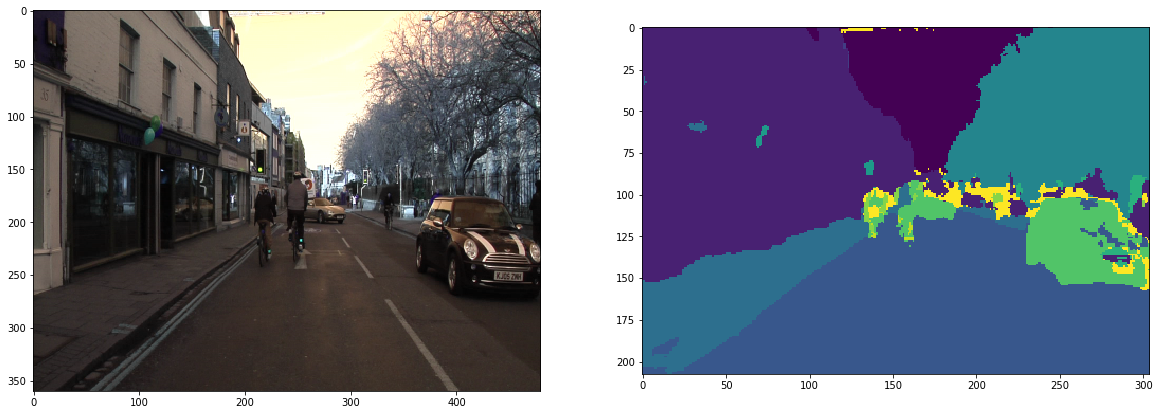

In [14]:
import matplotlib.pyplot as plt
import cv2

input_img = "dataset1/images_prepped_test/0016E5_07965.png"
out = model.predict_segmentation(
    inp=input_img,
    out_fname="/tmp/out.png"
)
plt.figure(figsize=(20,10))

org_img = cv2.imread(input_img)
plt.subplot(1,2,1)
plt.imshow(org_img)
plt.subplot(1,2,2)
plt.imshow(out)